In [191]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 导入处理数据 

In [192]:
db=pd.read_csv('./dataset/diabetes_data.csv',sep=',',header=0)
display(db.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [193]:
db_data=db[['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']]
db_target=db['target']

In [194]:
np.sum(db_data**2)

age    1.0
sex    1.0
bmi    1.0
bp     1.0
s1     1.0
s2     1.0
s3     1.0
s4     1.0
s5     1.0
s6     1.0
dtype: float64

In [195]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(db_data,db_target,test_size=0.2)

In [196]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((353, 10), (353,), (89, 10), (89,))

In [197]:
type(x_train),type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [198]:
y_train=y_train.values
y_test=y_test.values

In [199]:
x_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
183,0.045341,0.050680,-0.035307,0.063187,-0.004321,-0.001627,-0.010266,-0.002592,0.015567,0.056912
236,0.027178,-0.044642,0.006728,0.035644,0.079612,0.070710,0.015505,0.034309,0.040672,0.011349
361,0.041708,-0.044642,-0.007284,0.028758,-0.042848,-0.048286,0.052322,-0.076395,-0.072128,0.023775
148,-0.060003,0.050680,0.015350,-0.019442,0.036958,0.048164,0.019187,-0.002592,-0.030751,-0.001078
349,0.001751,0.050680,-0.057941,-0.043542,-0.096510,-0.047034,-0.098625,0.034309,-0.061177,-0.071494


In [200]:
 y_train

array([185.,  67., 182.,  96.,  88.,  94., 142., 297., 116., 310., 144.,
       132.,  91.,  90., 118.,  72., 220.,  81., 141., 222.,  51.,  93.,
       214., 131., 121.,  87.,  77.,  65.,  84., 201., 214., 220., 235.,
        37., 121., 248., 212., 115., 198., 146., 185.,  42.,  63., 125.,
       123.,  25., 101., 144., 283., 258.,  45., 197., 167.,  74., 281.,
       216.,  65.,  89., 102., 244.,  96., 248., 122., 170.,  51., 141.,
        48., 248., 101.,  97.,  59., 206., 258., 135., 270., 264.,  97.,
        83., 132.,  93.,  57., 275.,  77., 170., 104., 101., 155., 152.,
       115.,  83., 217., 236.,  48., 177.,  55.,  96., 232.,  54.,  67.,
       252., 202., 138.,  63.,  68.,  96., 135., 103., 302.,  39., 118.,
       141., 209., 217., 275., 233., 196., 129.,  69., 126., 220.,  87.,
       311., 200., 153., 102., 140., 229., 259., 268., 136.,  55.,  48.,
       161.,  52., 191.,  91.,  53., 174., 233., 257.,  72., 129.,  71.,
       245.,  78., 168., 178., 321.,  72.,  72., 10

In [201]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 183 to 231
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     353 non-null    float64
 1   sex     353 non-null    float64
 2   bmi     353 non-null    float64
 3   bp      353 non-null    float64
 4   s1      353 non-null    float64
 5   s2      353 non-null    float64
 6   s3      353 non-null    float64
 7   s4      353 non-null    float64
 8   s5      353 non-null    float64
 9   s6      353 non-null    float64
dtypes: float64(10)
memory usage: 30.3 KB


In [202]:
# 标准化前，再来看一眼数据：
display(x_train.head(3))
display(x_test.head(3))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
183,0.045341,0.050680,-0.035307,0.063187,-0.004321,-0.001627,-0.010266,-0.002592,0.015567,0.056912
236,0.027178,-0.044642,0.006728,0.035644,0.079612,0.070710,0.015505,0.034309,0.040672,0.011349
361,0.041708,-0.044642,-0.007284,0.028758,-0.042848,-0.048286,0.052322,-0.076395,-0.072128,0.023775


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
30,-0.060003,-0.044642,0.044451,-0.019442,-0.009825,-0.007577,0.022869,-0.039493,-0.027129,-0.009362
223,-0.099961,-0.044642,-0.023451,-0.064199,-0.057983,-0.060186,0.011824,-0.039493,-0.018118,-0.050783
271,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.021042,-0.039719,-0.002592,-0.018118,0.007207


# 线性回归

In [203]:
from sklearn.linear_model import LinearRegression  # 线性回归
# 初始化模型
lr = LinearRegression()
# 训练
lr.fit(x_train, y_train)
# 输出训练组合
print("在训练集训练得到参数组合为：\n其中w:\n", lr.coef_, "\nb:\n",lr.intercept_)

在训练集训练得到参数组合为：
其中w:
 [  22.72881603 -226.93503995  480.35423485  330.96837722 -770.32770762
  433.22221907  136.78489928  245.90748497  737.23920148   72.02198   ] 
b:
 151.29560173834838


In [204]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_train_pred = lr.predict(x_train)
print("在训练集上的决定系数r2得分为：", r2_score(y_train, y_train_pred))
print("在训练集上的均方误差MSE为：", mean_squared_error(y_train, y_train_pred))

y_test_pred = lr.predict(x_test)
print("在测试集上的决定系数r2得分为：", r2_score(y_test, y_test_pred))
print("在测试集上的均方误差MSE为：", mean_squared_error(y_test, y_test_pred))

在训练集上的决定系数r2得分为： 0.5191341978230968
在训练集上的均方误差MSE为： 2829.715852600747
在测试集上的决定系数r2得分为： 0.4954416722446674
在测试集上的均方误差MSE为： 3020.7621075024394


# 使用keras构建全连接网络进行预测

In [215]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import tensorflow as tf

# 构建网络结构
def get_baseline():
    # 1. 构建网络
    nn = Sequential() #初始化
    nn.add(Dense(15, input_dim = 10 ,activation=tf.nn.leaky_relu))
    nn.add(Dense(1,activation='linear'))
    print(nn.summary())
    # 2. 编译网络
    nn.compile(optimizer = optimizers.SGD(learning_rate = 0.001), 
                  loss = 'mean_squared_error')   
    return nn

In [216]:
#看损失
def plot_loss(hs):
    plt.figure(figsize=(8,5))
    plt.plot(hs.history['loss'],label='Train')
    plt.plot(hs.history['val_loss'],label='test')
    plt.title("Model loss")
    plt.xlabel("Epochs")
    plt.ylabel('MSE loss')
    plt.legend(loc=0)
    plt.show()
    return

In [217]:
# 定义
nn =get_baseline()
# 训练
hs=nn.fit(
    x=x_train,#特征
    y=y_train,
    batch_size=5, # 每个批次是五个样本，一共要更新404/5
    epochs=100,
    verbose=0, #0 不显示过程 1 精简显示 2 全显示
    validation_data=(x_test,y_test)
)

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 16        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
None


In [218]:
last_val_loss = nn.evaluate(x_test, y_test) 
last_val_loss

3/3 [==============================] - 0s 1ms/step - loss: 3129.9761


3129.97607421875

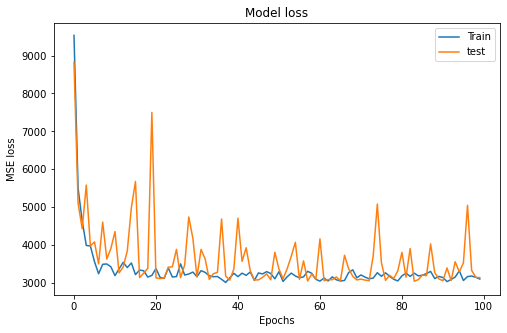

输入-隐藏的w (10, 15)
输入-隐藏的b (15,)
隐藏到输出的w (15, 1)
隐藏-输出的b (1,)
在训练集上的决定系数r2得分为： 0.4807047100480807
在训练集上的均方误差MSE为： 3055.8590515389906
在测试集上的决定系数r2得分为： 0.4771996600738396
在测试集上的均方误差MSE为： 3129.9760003250667
x_test中前十个样本 预测值 是：
 [166.3  128.88 178.75 188.21 115.11 176.96 187.79 136.16  80.13 218.68]
x_test中前十个样本 真实值 是：
 [129. 150. 127.  66.  88. 110. 143.  66. 143. 265.]


In [219]:
#画图
plot_loss(hs)
#看参数
print("输入-隐藏的w",nn.get_weights()[0].shape)
print("输入-隐藏的b",nn.get_weights()[1].shape)
print("隐藏到输出的w",nn.get_weights()[2].shape)
print("隐藏-输出的b",nn.get_weights()[3].shape)
#看决定系数
y_train_pred = nn.predict(x_train)
print("在训练集上的决定系数r2得分为：", r2_score(y_train, y_train_pred))
print("在训练集上的均方误差MSE为：", mean_squared_error(y_train, y_train_pred))

y_test_pred = nn.predict(x_test)
print("在测试集上的决定系数r2得分为：", r2_score(y_test, y_test_pred))
print("在测试集上的均方误差MSE为：", mean_squared_error(y_test, y_test_pred))
print('x_test中前十个样本 预测值 是：\n',y_test_pred[:10].flatten().round(2))
print('x_test中前十个样本 真实值 是：\n', y_test[:10])

# 模型保存加载 

In [172]:
from tensorflow.keras.models import load_model  

# 保存模型 ,生成模型文件 'my_model.h5'  
nn.save('db_MLP.h5')  
# 加载模型  
nn_reload = load_model('db_MLP.h5',custom_objects = {"leaky_relu":tf.nn.leaky_relu})
# 验证加载后模型效果
y_test_pred_reload = nn_reload.predict(x_test)
print('x_test中前十个样本 预测值 是：\n',y_test_pred_reload[:10].flatten().round(2))
print('x_test中前十个样本 真实值 是：\n', y_test[:10])

x_test中前十个样本 预测值 是：
 [137.77 160.04 238.45 127.46  64.06 239.69 104.7  154.86 116.52 129.19]
x_test中前十个样本 真实值 是：
 [103.  91. 268.  69.  96. 215. 101. 142.  47.  71.]


# 模型优化

In [189]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import tensorflow as tf
# 优化sgd的学习率lr
from tensorflow.keras import optimizers
# 构建网络结构
def get_baseline1():
    # 1. 构建网络
    nn = Sequential() #初始化
    nn.add(Dense(15, input_dim = 10 ,activation=tf.nn.leaky_relu))
    nn.add(Dense(10,activation=tf.nn.leaky_relu))  
    nn.add(Dense(1,activation='linear'))
    print(nn.summary())
    # 2. 编译网络
    nn.compile(optimizer = 'adam', 
                  loss = 'mean_squared_error')   
    return nn
# 定义
nn1 =get_baseline1()
# 训练
hs1=nn1.fit(
    x=x_train,#特征
    y=y_train,
    batch_size=5, # 每个批次是五个样本，一共要更新404/5
    epochs=100,
    verbose=2, #0 不显示过程 1 精简显示 2 全显示
    validation_data=(x_test,y_test)
)

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_77 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 11        
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
71/71 - 0s - loss: 28614.9668 - val_loss: 30510.9102
Epoch 2/100
71/71 - 0s - loss: 28346.6562 - val_loss: 30057.3828
Epoch 3/100
71/71 - 0s - loss: 27647.7402 - val_loss: 29002.9492
Epoch 4/100
71/71 - 0s - loss: 26284.6680 - val_loss: 27126.7383
Epoch 5/100
71/71 - 0s - loss: 24050.9668 - val_loss: 24313.0469
Epoch 6/100
71/71 - 0s - loss: 21010.9512 - val_loss: 2

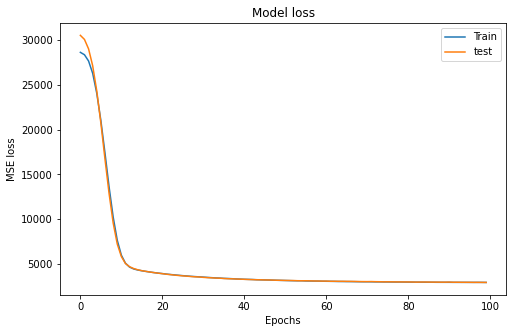

In [190]:
#画图
plot_loss(hs1)

# 总结

In [ ]:
# relu激活函数不适合测试集带有负数的 改成了leaky_relu   高级激活函数不能直接改名字需要导入包引用
# 在保存后加载模型的同时也需要增加导入